In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Olives Leaf diseases/train",

    batch_size=32,
    image_size=(256,256),
    shuffle=True,
)

Found 1511 files belonging to 3 classes.


In [3]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)  # Correct indentation
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds  # Correct indentation

In [4]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

38

In [ ]:
len(val_ds)

4

In [ ]:
len(test_ds)

6

In [5]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [ ]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax"),
])

model.summary()  # Affiche le résumé du modèle


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [ ]:
# Callback pour sauvegarde automatique
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/Rice diseases/Models/best_model.keras',     # nom du fichier à sauvegarder
    monitor='val_loss',
    save_best_only=True,            # sauvegarde seulement si meilleur val_loss
    save_weights_only=False,        # True si tu veux juste les poids
    verbose=1                       # affiche un message à chaque sauvegarde
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=200,
    batch_size=32,
    validation_data=val_ds,
    callbacks=[early_stopping]
)


Epoch 1/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 49s 208ms/step - accuracy: 0.3273 - loss: 4.8912 - val_accuracy: 0.5825 - val_loss: 1.0373
Epoch 2/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5259 - loss: 1.0088 - val_accuracy: 0.6990 - val_loss: 0.7741
Epoch 3/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.5689 - loss: 0.8700 - val_accuracy: 0.6699 - val_loss: 0.7042
Epoch 4/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6546 - loss: 0.7134 - val_accuracy: 0.7767 - val_loss: 0.5872
Epoch 5/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7075 - loss: 0.6276 - val_accuracy: 0.7184 - val_loss: 0.6162
Epoch 6/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6794 - loss: 0.6773 - val_accuracy: 0.7864 - val_loss: 0.5432
Epoch 7/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6914 - loss: 0.6478 - val_accuracy: 0.7282 - val_loss: 0.5576
Epoch 8/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6887 - loss: 0.6568 - val_accuracy: 

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/Olives Leaf diseases/train/model1.keras")

In [7]:
from tensorflow.keras.models import load_model

model1 = load_model("/content/drive/MyDrive/Colab Notebooks/Olives Leaf diseases/train/model1.keras")

In [ ]:
history = model1.fit(
    train_ds,
    epochs=200,
    initial_epoch=45,
    batch_size=32,
    validation_data=val_ds,
    callbacks=[early_stopping]
)


Epoch 46/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.9076 - loss: 0.2150 - val_accuracy: 0.8544 - val_loss: 0.3054
Epoch 47/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8673 - loss: 0.3213 - val_accuracy: 0.9417 - val_loss: 0.1511
Epoch 48/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8936 - loss: 0.2685 - val_accuracy: 0.8932 - val_loss: 0.2723
Epoch 49/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.8925 - loss: 0.2501 - val_accuracy: 0.9223 - val_loss: 0.2130
Epoch 50/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9169 - loss: 0.2141 - val_accuracy: 0.9417 - val_loss: 0.1903
Epoch 51/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9058 - loss: 0.2390 - val_accuracy: 0.9223 - val_loss: 0.2107
Epoch 52/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9184 - loss: 0.2090 - val_accuracy: 0.8932 - val_loss: 0.3259


In [ ]:
model1.save("/content/drive/MyDrive/Colab Notebooks/Olives Leaf diseases/train/model1.keras")

In [ ]:
scores=model1.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9147 - loss: 0.1823


In [ ]:
history = model1.fit(
    train_ds,
    epochs=200,
    initial_epoch=52,
    batch_size=32,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 53/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9162 - loss: 0.2248 - val_accuracy: 0.9126 - val_loss: 0.2328
Epoch 54/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9144 - loss: 0.2611 - val_accuracy: 0.9223 - val_loss: 0.2870
Epoch 55/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8984 - loss: 0.2603 - val_accuracy: 0.9126 - val_loss: 0.2750
Epoch 56/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9308 - loss: 0.2057 - val_accuracy: 0.9126 - val_loss: 0.1728
Epoch 57/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9385 - loss: 0.2105 - val_accuracy: 0.9320 - val_loss: 0.1603
Epoch 58/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9186 - loss: 0.1958 - val_accuracy: 0.9515 - val_loss: 0.1880
Epoch 59/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9354 - loss: 0.1893 - val_accuracy: 0.9029 - val_loss: 0.2564
Epoch 60/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9267 - loss: 0.1781 - val_accu

In [ ]:
history = model1.fit(
    train_ds,
    epochs=200,
    initial_epoch=62,
    batch_size=32,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 63/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9341 - loss: 0.1746 - val_accuracy: 0.9515 - val_loss: 0.1502
Epoch 64/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9241 - loss: 0.1962 - val_accuracy: 0.9320 - val_loss: 0.1922
Epoch 65/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9105 - loss: 0.2411 - val_accuracy: 0.9709 - val_loss: 0.1297
Epoch 66/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9352 - loss: 0.1709 - val_accuracy: 0.9515 - val_loss: 0.1492
Epoch 67/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9303 - loss: 0.2027 - val_accuracy: 0.9320 - val_loss: 0.1656
Epoch 68/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9349 - loss: 0.1759 - val_accuracy: 0.9320 - val_loss: 0.1659
Epoch 69/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9117 - loss: 0.2411 - val_accuracy: 0.9417 - val_loss: 0.1542
Epoch 70/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9405 - loss: 0.1596 - val_accu

In [ ]:
history = model1.fit(
    train_ds,
    epochs=200,
    initial_epoch=70,
    batch_size=32,

    validation_data=val_ds,
    callbacks=[early_stopping]
)

Epoch 71/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9409 - loss: 0.1628 - val_accuracy: 0.9126 - val_loss: 0.1831
Epoch 72/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9340 - loss: 0.1659 - val_accuracy: 0.9417 - val_loss: 0.1577
Epoch 73/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9561 - loss: 0.1366 - val_accuracy: 0.9417 - val_loss: 0.1909
Epoch 74/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9343 - loss: 0.1767 - val_accuracy: 0.9612 - val_loss: 0.1413
Epoch 75/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9062 - loss: 0.2334 - val_accuracy: 0.9126 - val_loss: 0.1962
Epoch 76/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9216 - loss: 0.1939 - val_accuracy: 0.9320 - val_loss: 0.1994
Epoch 77/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9509 - loss: 0.1399 - val_accuracy: 0.9223 - val_loss: 0.1839
Epoch 78/200
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9309 - loss: 0.1886 - val_accu

In [ ]:
model1.save("/content/drive/MyDrive/Colab Notebooks/Olives Leaf diseases/train/model2.keras")

In [8]:
model2=load_model("/content/drive/MyDrive/Colab Notebooks/Olives Leaf diseases/train/model2.keras")
scores=model2.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 232s 19ms/step - accuracy: 0.9580 - loss: 0.1713


In [ ]:
class_names=dataset.class_names
class_names

['Healthy', 'aculus_olearius', 'olive_peacock_spot']

first image to predict
actual label: aculus_olearius
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
predected label:  aculus_olearius


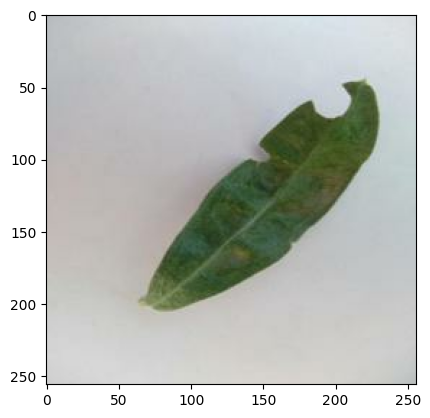

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1) :
   first_image=images_batch[0].numpy().astype('uint8')
   first_label=labels_batch[0].numpy()

   print("first image to predict")
   plt.imshow(first_image)
   print("actual label:",class_names[first_label])
   batch_prediction=model2.predict(images_batch)
   print("predected label: ",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict (model2, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model2.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max (predictions[0])), 2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


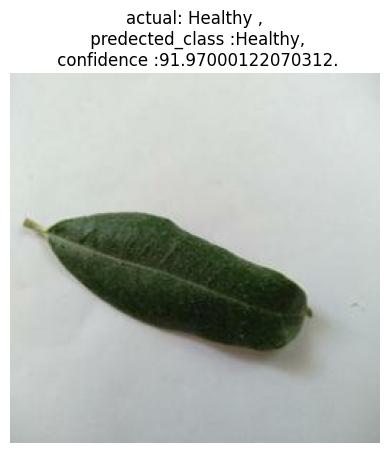

In [ ]:
import numpy as np
for images,labels in test_ds.take(1):
    for i in range(2):
      plt.imshow(images[i].numpy().astype('uint8'))
      predicted_class, confidence=predict(model2,images[i].numpy())
      actual_class=class_names[labels[i]]
      plt.title(f"actual: {actual_class} ,\n predected_class :{predicted_class},\n confidence :{confidence}.")
      plt.axis("off")

